In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce202402')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *
from copy import deepcopy
from shapely.geometry import Point,LineString
from pyproj import Proj, Transformer
import pickle
import itertools
import random
from sympy import symbols, Eq, solve
import datetime

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Plot and calculate results of excel got from cluster

In [166]:
city_two_layer_network_edges_gdf = gpd.GeoDataFrame(city_two_layer_network_edges.copy())

In [167]:
scl_df = pd.read_excel('C:\\projects\\UTNCE\\src\\utnce202402\\Cluster_py\\city_two_layer_network_edges_scl_1586_0722.xlsx',header=0)
scl_df = scl_df[['simple_connectivity_loss', 'id']].drop_duplicates(subset='id').reset_index(drop=True)
city_two_layer_network_edges_scl_df = pd.merge(scl_df, city_two_layer_network_edges, on='id',how='right')
city_two_layer_network_edges_scl_gdf = gpd.GeoDataFrame(city_two_layer_network_edges_scl_df.copy(), geometry='geometry')
city_two_layer_network_edges_scl_gdf

,simple_connectivity_loss,id,osm_id,geometry,railway,service,from_id,to_id,distance,time,to_from,from_to,count_weight,route_name_list,route,ref,weights,wcl_weights
0,0.022702,163,39271219,"LINESTRING (4.83386 52.3646, 4.83387 52.36432)",subway,None,147,25,31.352181,0.001254,"(25, 147)","(147, 25)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",31.352181,31.352181
1,0.022702,16,23207806,"LINESTRING (4.83387 52.36432, 4.83388 52.36379)",subway,None,25,23,59.170137,0.002367,"(23, 25)","(25, 23)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",59.170137,59.170137
2,0.022702,15,23207802,"LINESTRING (4.83388 52.36379, 4.83391 52.36294)",subway,None,23,24,93.935464,0.003757,"(24, 23)","(23, 24)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",93.935464,93.935464
3,0.022702,106,26983218,"LINESTRING (4.83391 52.36294, 4.83392 52.36257)",subway,None,24,109,41.168856,0.001647,"(109, 24)","(24, 109)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",41.168856,41.168856
4,0.022702,114,26983222,"LINESTRING (4.83392 52.36257, 4.83392 52.36247)",subway,None,109,588,11.809676,0.000472,"(588, 109)","(109, 588)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",11.809676,11.809676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,0.000000,3565,NaN,"LINESTRING (4.90712 52.361, 4.90792 52.36133)",NaN,NaN,2448,138,106.592997,15.000000,"(138, 2448)","(2448, 138)",NaN,NaN,NaN,NaN,6250.000000,1400.000000
2534,0.000000,3566,NaN,"LINESTRING (4.90916 52.3614, 4.90785 52.36131)",NaN,NaN,2449,460,146.981525,15.000000,"(460, 2449)","(2449, 460)",NaN,NaN,NaN,NaN,6250.000000,1400.000000
2535,0.000000,3567,NaN,"LINESTRING (4.90712 52.361, 4.90785 52.36131)",NaN,NaN,2448,460,98.324093,15.000000,"(460, 2448)","(2448, 460)",NaN,NaN,NaN,NaN,6250.000000,1400.000000
2536,0.000000,3568,NaN,"LINESTRING (4.87318 52.34082, 4.87396 52.33932)",NaN,NaN,1068,840,285.700786,15.000000,"(840, 1068)","(1068, 840)",NaN,NaN,NaN,NaN,6250.000000,1400.000000


In [168]:
city_two_layer_network_edges_scl_gdf.sort_values(by='simple_connectivity_loss')

,simple_connectivity_loss,id,osm_id,geometry,railway,service,from_id,to_id,distance,time,to_from,from_to,count_weight,route_name_list,route,ref,weights,wcl_weights
2529,0.000000,3561,NaN,"LINESTRING (4.90536 52.36796, 4.90375 52.36669)",NaN,NaN,2367,137,292.714426,15.000000,"(137, 2367)","(2367, 137)",NaN,NaN,NaN,NaN,6250.000000,1400.000000
2533,0.000000,3565,NaN,"LINESTRING (4.90712 52.361, 4.90792 52.36133)",NaN,NaN,2448,138,106.592997,15.000000,"(138, 2448)","(2448, 138)",NaN,NaN,NaN,NaN,6250.000000,1400.000000
2532,0.000000,3564,NaN,"LINESTRING (4.90916 52.3614, 4.90792 52.36133)",NaN,NaN,2449,138,138.786806,15.000000,"(138, 2449)","(2449, 138)",NaN,NaN,NaN,NaN,6250.000000,1400.000000
2531,0.000000,3563,NaN,"LINESTRING (4.90198 52.36699, 4.90375 52.36669)",NaN,NaN,2381,137,204.423920,15.000000,"(137, 2381)","(2381, 137)",NaN,NaN,NaN,NaN,6250.000000,1400.000000
2530,0.000000,3562,NaN,"LINESTRING (4.90223 52.36717, 4.90361 52.36664)",NaN,NaN,2586,459,181.772452,15.000000,"(459, 2586)","(2586, 459)",NaN,NaN,NaN,NaN,6250.000000,1400.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,0.189189,776,503528374,"LINESTRING (4.93364 52.32594, 4.93355 52.32602)",subway,None,232,230,10.553001,0.000422,"(230, 232)","(232, 230)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54",10.553001,10.553001
436,0.189189,251,166130766,"LINESTRING (4.93616 52.32384, 4.936 52.32399, ...",subway,None,230,222,290.623746,0.011625,"(222, 230)","(230, 222)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54",290.623746,290.623746
437,0.189189,243,166130761,"LINESTRING (4.93616 52.32384, 4.93646 52.32356)",subway,None,222,851,36.884831,0.001475,"(851, 222)","(222, 851)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54",36.884831,36.884831
404,0.189189,255,166130768,"LINESTRING (4.93098 52.32867, 4.93096 52.3287)",subway,None,214,236,3.847156,0.000154,"(236, 214)","(214, 236)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54",3.847156,3.847156


In [169]:
city_two_layer_network_edges_scl_gdf[city_two_layer_network_edges_scl_gdf.railway=='tram'].sort_values(by='simple_connectivity_loss')

,simple_connectivity_loss,id,osm_id,geometry,railway,service,from_id,to_id,distance,time,to_from,from_to,count_weight,route_name_list,route,ref,weights,wcl_weights
2171,0.0,1392,38921549,"LINESTRING (4.99609 52.35474, 4.99635 52.3546,...",tram,None,1286,2614,264.234564,0.018874,"(2614, 1286)","(1286, 2614)",1.0,Tram 26: Amsterdam Centraal Station => Amsterd...,tram,26,264.234564,264.234564
2170,0.0,3094,911834556,"LINESTRING (4.99605 52.35482, 4.99614 52.35477)",tram,None,1384,2307,7.857436,0.000561,"(2307, 1384)","(1384, 2307)",1.0,Tram 26: Amsterdam IJburg => Amsterdam Centraa...,tram,26,7.857436,7.857436
2169,0.0,3096,911834558,"LINESTRING (4.996 52.35478, 4.99609 52.35474)",tram,None,2308,1286,7.721929,0.000552,"(1286, 2308)","(2308, 1286)",1.0,Tram 26: Amsterdam Centraal Station => Amsterd...,tram,26,7.721929,7.721929
2168,0.0,3093,911834555,"LINESTRING (4.99588 52.35491, 4.99605 52.35482)",tram,None,2307,2612,15.604225,0.001115,"(2612, 2307)","(2307, 2612)",1.0,Tram 26: Amsterdam IJburg => Amsterdam Centraa...,tram,26,15.604225,15.604225
2167,0.0,3095,911834557,"LINESTRING (4.99462 52.35552, 4.99508 52.35527...",tram,None,1599,2308,124.257802,0.008876,"(2308, 1599)","(1599, 2308)",1.0,Tram 26: Amsterdam Centraal Station => Amsterd...,tram,26,124.257802,124.257802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,0.0,2344,458116523,"LINESTRING (5.00186 52.35168, 5.00199 52.35161...",tram,None,1606,1562,25.405890,0.001815,"(1562, 1606)","(1606, 1562)",1.0,Tram 26: Amsterdam Centraal Station => Amsterd...,tram,26,25.405890,25.405890
2179,0.0,2345,458116523,"LINESTRING (5.00215 52.35153, 5.00252 52.35133...",tram,None,1562,1563,194.364734,0.013883,"(1563, 1562)","(1562, 1563)",1.0,Tram 26: Amsterdam Centraal Station => Amsterd...,tram,26,194.364734,194.364734
2180,0.0,2346,458116523,"LINESTRING (5.00454 52.35101, 5.0049 52.35113)",tram,None,1563,2034,28.593211,0.002042,"(2034, 1563)","(1563, 2034)",1.0,Tram 26: Amsterdam Centraal Station => Amsterd...,tram,26,28.593211,28.593211
2181,0.0,2746,738357515,"LINESTRING (5.0049 52.35113, 5.00495 52.35116,...",tram,None,2034,1284,413.902712,0.029564,"(1284, 2034)","(2034, 1284)",1.0,Tram 26: Amsterdam IJburg => Amsterdam Centraa...,tram,26,413.902712,413.902712


In [170]:
df = city_two_layer_network_edges_scl_gdf[city_two_layer_network_edges_scl_gdf.railway=='subway'].sort_values(by='simple_connectivity_loss')
len(df[df.simple_connectivity_loss>0.1])/len(df)

0.1619496855345912

In [171]:
df.simple_connectivity_loss.max()

np.float64(0.1891891891891891)

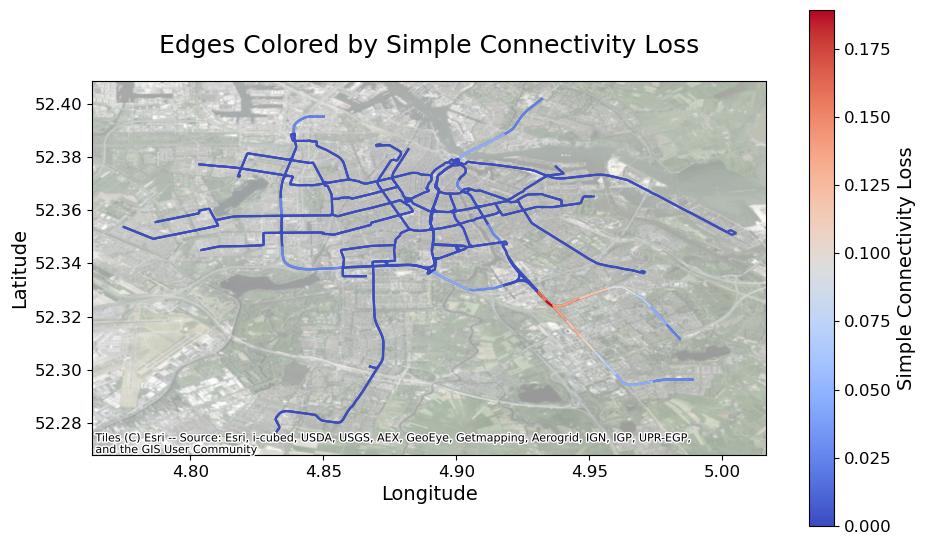

In [172]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

# Create a figure and axis object
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot the base transportation network in grey
city_two_layer_network_edges_gdf.plot(color='grey', ax=ax)

# Plot the edges colored by simple connectivity loss
city_two_layer_network_edges_scl_gdf.plot(column='simple_connectivity_loss', ax=ax, legend=True, cmap='coolwarm')

# Add a basemap using contextily with transparency
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

# Set the title of the plot with a larger font size and padding for spacing
ax.set_title('Edges Colored by Simple Connectivity Loss', fontsize=18, pad=20)

# Set the x and y axis labels with a larger font size
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Set the font size for the axis tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Access the colorbar, and set its label and font size
cbar = ax.get_figure().get_axes()[-1]  # Get the colorbar axis
cbar.set_ylabel("Simple Connectivity Loss", fontsize=14)  # Set the label for the colorbar
cbar.tick_params(labelsize=12)  # Set the font size for the colorbar ticks

# Use tight_layout to automatically adjust the layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

In [173]:
wcl_df = pd.read_excel('C:\\projects\\UTNCE\\src\\utnce202402\\Cluster_py\\city_two_layer_network_edges_dwcl_1586_0817.xlsx',header=0)
wcl_df = wcl_df[['DWCL_weights', 'id']].drop_duplicates(subset='id').reset_index(drop=True)
city_two_layer_network_edges_wcl_df = pd.merge(wcl_df, city_two_layer_network_edges, on='id',how='right')
city_two_layer_network_edges_wcl_gdf = gpd.GeoDataFrame(city_two_layer_network_edges_wcl_df.copy(), geometry='geometry')

In [174]:
city_two_layer_network_edges_wcl_gdf

,DWCL_weights,id,osm_id,geometry,railway,service,from_id,to_id,distance,time,to_from,from_to,count_weight,route_name_list,route,ref,weights,wcl_weights
0,0.050871,163,39271219,"LINESTRING (4.83386 52.3646, 4.83387 52.36432)",subway,None,147,25,31.352181,0.001254,"(25, 147)","(147, 25)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",31.352181,31.352181
1,0.050871,16,23207806,"LINESTRING (4.83387 52.36432, 4.83388 52.36379)",subway,None,25,23,59.170137,0.002367,"(23, 25)","(25, 23)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",59.170137,59.170137
2,0.050871,15,23207802,"LINESTRING (4.83388 52.36379, 4.83391 52.36294)",subway,None,23,24,93.935464,0.003757,"(24, 23)","(23, 24)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",93.935464,93.935464
3,0.050871,106,26983218,"LINESTRING (4.83391 52.36294, 4.83392 52.36257)",subway,None,24,109,41.168856,0.001647,"(109, 24)","(24, 109)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",41.168856,41.168856
4,0.050871,114,26983222,"LINESTRING (4.83392 52.36257, 4.83392 52.36247)",subway,None,109,588,11.809676,0.000472,"(588, 109)","(109, 588)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51",11.809676,11.809676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,0.000000,3565,NaN,"LINESTRING (4.90712 52.361, 4.90792 52.36133)",NaN,NaN,2448,138,106.592997,15.000000,"(138, 2448)","(2448, 138)",NaN,NaN,NaN,NaN,6250.000000,1400.000000
2534,0.000000,3566,NaN,"LINESTRING (4.90916 52.3614, 4.90785 52.36131)",NaN,NaN,2449,460,146.981525,15.000000,"(460, 2449)","(2449, 460)",NaN,NaN,NaN,NaN,6250.000000,1400.000000
2535,-0.000969,3567,NaN,"LINESTRING (4.90712 52.361, 4.90785 52.36131)",NaN,NaN,2448,460,98.324093,15.000000,"(460, 2448)","(2448, 460)",NaN,NaN,NaN,NaN,6250.000000,1400.000000
2536,0.000021,3568,NaN,"LINESTRING (4.87318 52.34082, 4.87396 52.33932)",NaN,NaN,1068,840,285.700786,15.000000,"(840, 1068)","(1068, 840)",NaN,NaN,NaN,NaN,6250.000000,1400.000000


In [175]:
city_two_layer_network_edges_wcl_gdf[city_two_layer_network_edges_wcl_gdf.weights == 6250.000000].sort_values(by='DWCL_weights')

,DWCL_weights,id,osm_id,geometry,railway,service,from_id,to_id,distance,time,to_from,from_to,count_weight,route_name_list,route,ref,weights,wcl_weights
663,-0.010109,989,NaN,"LINESTRING (4.93007 52.32965, 4.93045 52.32978)",NaN,NaN,825,828,48.479415,15.0,"(828, 825)","(825, 828)",NaN,NaN,NaN,NaN,6250.0,1400.0
665,-0.008956,991,NaN,"LINESTRING (4.93007 52.32965, 4.93028 52.32974)",NaN,NaN,825,827,27.614135,15.0,"(827, 825)","(825, 827)",NaN,NaN,NaN,NaN,6250.0,1400.0
651,-0.008180,977,NaN,"LINESTRING (4.92085 52.34025, 4.9208 52.34023)",NaN,NaN,832,831,6.140884,15.0,"(831, 832)","(832, 831)",NaN,NaN,NaN,NaN,6250.0,1400.0
666,-0.007719,992,NaN,"LINESTRING (4.93024 52.32972, 4.93045 52.32978)",NaN,NaN,826,828,26.920429,15.0,"(828, 826)","(826, 828)",NaN,NaN,NaN,NaN,6250.0,1400.0
668,-0.005537,994,NaN,"LINESTRING (4.93024 52.32972, 4.93028 52.32974)",NaN,NaN,826,827,6.013966,15.0,"(827, 826)","(826, 827)",NaN,NaN,NaN,NaN,6250.0,1400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,0.003464,984,NaN,"LINESTRING (4.92105 52.34029, 4.92085 52.34025)",NaN,NaN,833,832,22.749356,15.0,"(832, 833)","(833, 832)",NaN,NaN,NaN,NaN,6250.0,1400.0
671,0.006356,997,NaN,"LINESTRING (4.93028 52.32974, 4.93024 52.32972)",NaN,NaN,827,826,6.013966,15.0,"(826, 827)","(827, 826)",NaN,NaN,NaN,NaN,6250.0,1400.0
661,0.008754,987,NaN,"LINESTRING (4.93045 52.32978, 4.93024 52.32972)",NaN,NaN,828,826,26.920429,15.0,"(826, 828)","(828, 826)",NaN,NaN,NaN,NaN,6250.0,1400.0
670,0.009613,996,NaN,"LINESTRING (4.93028 52.32974, 4.93007 52.32965)",NaN,NaN,827,825,27.614135,15.0,"(825, 827)","(827, 825)",NaN,NaN,NaN,NaN,6250.0,1400.0


In [176]:
df1 = city_two_layer_network_edges_wcl_gdf[city_two_layer_network_edges_wcl_gdf.railway == 'tram'].sort_values(by='DWCL_weights')
df1

,DWCL_weights,id,osm_id,geometry,railway,service,from_id,to_id,distance,time,to_from,from_to,count_weight,route_name_list,route,ref,weights,wcl_weights
2180,0.000000,2346,458116523,"LINESTRING (5.00454 52.35101, 5.0049 52.35113)",tram,None,1563,2034,28.593211,0.002042,"(2034, 1563)","(1563, 2034)",1.0,Tram 26: Amsterdam Centraal Station => Amsterd...,tram,26,28.593211,28.593211
733,0.000000,1195,27029145,"LINESTRING (4.80627 52.37694, 4.80638 52.37693...",tram,None,2498,1106,154.755100,0.011054,"(1106, 2498)","(2498, 1106)",1.0,Tram 13: Amsterdam Geuzenveld => Amsterdam Cen...,tram,13,154.755100,154.755100
734,0.000000,1983,323879274,"LINESTRING (4.80657 52.37694, 4.80649 52.37695...",tram,None,2684,1101,226.501389,0.016179,"(1101, 2684)","(2684, 1101)",1.0,Tram 13: Amsterdam Centraal Station => Amsterd...,tram,13,226.501389,226.501389
735,0.000000,1226,27053444,"LINESTRING (4.80775 52.35933, 4.8077 52.3594, ...",tram,None,2444,2136,203.882820,0.014563,"(2136, 2444)","(2444, 2136)",1.0,Tram 17: Amsterdam Centraal Station => Amsterd...,tram,17,203.882820,203.882820
736,0.000000,2019,324002511,"LINESTRING (4.80806 52.35864, 4.8081 52.35856,...",tram,None,2697,1128,242.676575,0.017334,"(1128, 2697)","(2697, 1128)",1.0,Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,tram,17,242.676575,242.676575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,0.003418,2367,460929190,"LINESTRING (4.89197 52.33791, 4.89209 52.33892...",tram,None,1921,2628,281.826821,0.020130,"(2628, 1921)","(1921, 2628)",1.0,Tram 4: Amsterdam Station RAI => Amsterdam Cen...,tram,4,281.826821,281.826821
1626,0.003418,2593,653389825,"LINESTRING (4.89144 52.33742, 4.89148 52.33744...",tram,None,1851,1920,48.509841,0.003465,"(1920, 1851)","(1851, 1920)",1.0,Tram 4: Amsterdam Station RAI => Amsterdam Cen...,tram,4,48.509841,48.509841
1571,0.003418,2080,325880098,"LINESTRING (4.89064 52.33692, 4.89102 52.33719...",tram,None,2629,1851,78.814046,0.005630,"(1851, 2629)","(2629, 1851)",1.0,Tram 4: Amsterdam Station RAI => Amsterdam Cen...,tram,4,78.814046,78.814046
1639,0.003418,2203,377776704,"LINESTRING (4.89193 52.33772, 4.89195 52.33777...",tram,None,1920,1921,20.615111,0.001473,"(1921, 1920)","(1920, 1921)",1.0,Tram 4: Amsterdam Station RAI => Amsterdam Cen...,tram,4,20.615111,20.615111


In [177]:
df1[df1.DWCL_weights == 0]

,DWCL_weights,id,osm_id,geometry,railway,service,from_id,to_id,distance,time,to_from,from_to,count_weight,route_name_list,route,ref,weights,wcl_weights
2180,0.0,2346,458116523,"LINESTRING (5.00454 52.35101, 5.0049 52.35113)",tram,None,1563,2034,28.593211,0.002042,"(2034, 1563)","(1563, 2034)",1.0,Tram 26: Amsterdam Centraal Station => Amsterd...,tram,26,28.593211,28.593211
733,0.0,1195,27029145,"LINESTRING (4.80627 52.37694, 4.80638 52.37693...",tram,None,2498,1106,154.755100,0.011054,"(1106, 2498)","(2498, 1106)",1.0,Tram 13: Amsterdam Geuzenveld => Amsterdam Cen...,tram,13,154.755100,154.755100
734,0.0,1983,323879274,"LINESTRING (4.80657 52.37694, 4.80649 52.37695...",tram,None,2684,1101,226.501389,0.016179,"(1101, 2684)","(2684, 1101)",1.0,Tram 13: Amsterdam Centraal Station => Amsterd...,tram,13,226.501389,226.501389
735,0.0,1226,27053444,"LINESTRING (4.80775 52.35933, 4.8077 52.3594, ...",tram,None,2444,2136,203.882820,0.014563,"(2136, 2444)","(2444, 2136)",1.0,Tram 17: Amsterdam Centraal Station => Amsterd...,tram,17,203.882820,203.882820
736,0.0,2019,324002511,"LINESTRING (4.80806 52.35864, 4.8081 52.35856,...",tram,None,2697,1128,242.676575,0.017334,"(1128, 2697)","(2697, 1128)",1.0,Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,tram,17,242.676575,242.676575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,0.0,2876,770460803,"LINESTRING (4.92416 52.36162, 4.92412 52.36168...",tram,None,2600,1191,206.311610,0.014737,"(1191, 2600)","(2600, 1191)",1.0,Tram 19: Diemen Sniep => Amsterdam Sloterdijk,tram,19,206.311610,206.311610
1663,0.0,3104,988973139,"LINESTRING (4.8929 52.36527, 4.89291 52.36533,...",tram,None,1895,2725,66.152632,0.004725,"(2725, 1895)","(1895, 2725)",1.0,Tram 24: Amsterdam VUmc => Amsterdam Centraal ...,tram,24,66.152632,66.152632
1666,0.0,3105,988973139,"LINESTRING (4.89306 52.36585, 4.89312 52.36605...",tram,None,2725,2060,94.250487,0.006732,"(2060, 2725)","(2725, 2060)",1.0,Tram 24: Amsterdam VUmc => Amsterdam Centraal ...,tram,24,94.250487,94.250487
1668,0.0,1766,311941850,"LINESTRING (4.89313 52.36627, 4.89309 52.36611...",tram,None,2724,1636,111.901083,0.007993,"(1636, 2724)","(2724, 1636)",1.0,Tram 24: Amsterdam Centraal Station => Amsterd...,tram,24,111.901083,111.901083


In [178]:
df1 = city_two_layer_network_edges_wcl_gdf[city_two_layer_network_edges_wcl_gdf.railway == 'subway'].sort_values(by='DWCL_weights')
len(df1[df1.DWCL_weights>0.1])/len(df1)

0.23270440251572327

In [179]:
df1.DWCL_weights.max()

np.float64(0.2887841267437311)

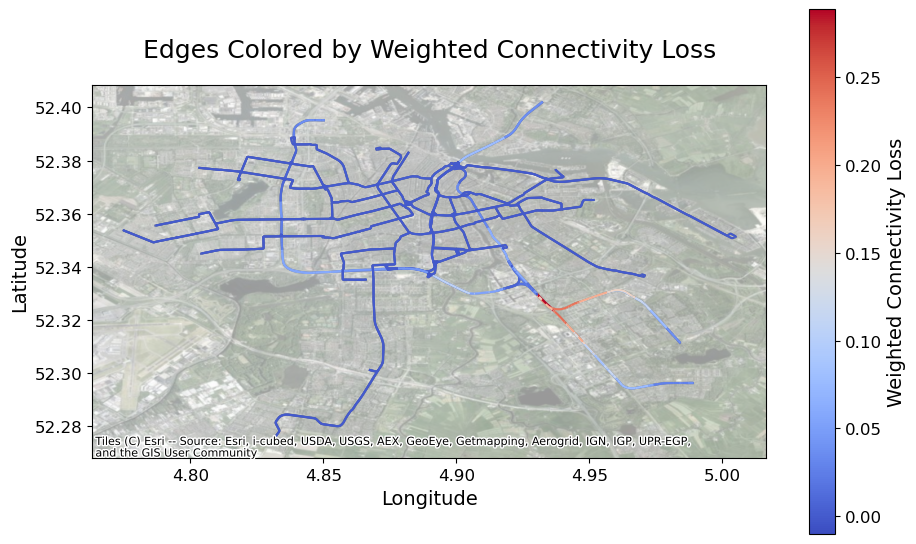

In [180]:
# Create a figure and axis object
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot the base transportation network in grey
city_two_layer_network_edges_gdf.plot(color='grey', ax=ax)

# Plot the edges colored by simple connectivity loss
city_two_layer_network_edges_wcl_gdf.plot(column='DWCL_weights', ax=ax, legend=True, cmap='coolwarm')

# Add a basemap using contextily with transparency
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

# Set the title of the plot with a larger font size and padding for spacing
ax.set_title('Edges Colored by Weighted Connectivity Loss', fontsize=18, pad=20)

# Set the x and y axis labels with a larger font size
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Set the font size for the axis tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Access the colorbar, and set its label and font size
cbar = ax.get_figure().get_axes()[-1]  # Get the colorbar axis
cbar.set_ylabel("Weighted Connectivity Loss", fontsize=14)  # Set the label for the colorbar
cbar.tick_params(labelsize=12)  # Set the font size for the colorbar ticks

# Use tight_layout to automatically adjust the layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

In [161]:
city_two_layer_network_edges.reset_index(drop=True,inplace=True)
columns = ['removed_edge_id', 'DWCL_weights', 'DWCL_distance']
dwcl_each_disruption = pd.DataFrame(columns=columns)
dwcl_df = pd.DataFrame(columns=columns)
OD_dis_shortest_path_edges_dict = {}

# for i in removed_edges_id_list:
for i in range(50):
# for i in range(len(city_two_layer_network_edges)):
    # Get the the two_layer_network_edges after removing one edges under targeted disruption
    removed_connection_edges_list = [city_two_layer_network_edges.iloc[i]['id']]
    dwcl_each_disruption['removed_edge_id'] = removed_connection_edges_list
    remove_condition = ~city_two_layer_network_edges['id'].isin(removed_connection_edges_list)
    dis_city_two_layer_network_edges = city_two_layer_network_edges[remove_condition]

    # Create diGraph
    G2 = nx.DiGraph()
    
    for node_index, row in city_two_layer_network_nodes.iterrows():
        geometry = row['geometry']
        node_id = row['id']
        x,y = geometry.x, geometry.y
        G2.add_node(node_id, pos = (x,y))
    
    edges_for_G2 = dis_city_two_layer_network_edges[['from_id', 'to_id', 'time', 'weights']]
    edges_for_G2['time'] = edges_for_G2['time']
    edges_for_G2['weights'] = edges_for_G2['weights']
    for edges, row in edges_for_G2.iterrows():
        from_id = row['from_id']
        to_id = row['to_id']
        weight = row['weights']
        # capacity = row['capacity']
        # length = row['weights']
        G2.add_edge(from_id, to_id, weight = weight)
    
    # Calculate shortest path for all OD pairs
    OD_dis_shortest_path_nodes_id = {}
    OD_dis_shortest_path_edges = {}
    OD_dis_length_s_e = {}
    for index, row in OD_id_pairs_df.iterrows():
        try:
            path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight = "weight")
            # path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight = "weights")
            OD_dis_shortest_path_nodes_id[index] = path_s_e
            OD_dis_shortest_path_edges[index] = short_path_edges
            OD_dis_length_s_e[index] = length_s_e
            OD_dis_shortest_path_edges_dict[i] = OD_dis_shortest_path_edges
        except nx.NetworkXNoPath:
            # print(f"No path between {row.s_id} and {row.e_id}. Skipping...")
            continue
    
    # Calculate simple connective loss metrics
    OD_sink_id_wcl = OD_sink_id_DW(OD_id_pairs_df,OD_shortest_path_edges,OD_shortest_path_nodes_id,OD_dis_shortest_path_edges,OD_dis_shortest_path_nodes_id)
    DWCL_weigths = 1- sum(OD_sink_id_wcl.DWCL_weights) / len(destination_id_df)
    DWCL_distance = 1- sum(OD_sink_id_wcl.DWCL_distance) / len(destination_id_df)    
    dwcl_each_disruption['DWCL_weights'] = DWCL_weigths
    dwcl_each_disruption['DWCL_distance'] = DWCL_distance
    dwcl_df = pd.concat([dwcl_df,dwcl_each_disruption]).reset_index(drop=True)

In [162]:
dwcl_df

,removed_edge_id,DWCL_weights,DWCL_distance
0,163,0.047384,0.049288
1,16,0.047384,0.049288
2,15,0.047384,0.049315
3,106,0.047384,0.049315
4,114,0.047384,0.049315
5,115,0.047384,0.049315
6,108,0.003436,0.003458
7,107,0.030463,0.030485
8,119,0.030463,0.030485
9,118,0.030463,0.030465


In [163]:
dwcl_df[dwcl_df.DWCL_weights < 0]

,removed_edge_id,DWCL_weights,DWCL_distance


In [161]:
city_two_layer_network_edges.reset_index(drop=True,inplace=True)
columns = ['removed_edge_id', 'DWCL_weights', 'DWCL_distance']
dwcl_each_disruption = pd.DataFrame(columns=columns)
dwcl_df = pd.DataFrame(columns=columns)
OD_dis_shortest_path_edges_dict = {}

# for i in removed_edges_id_list:
for i in range(50):
# for i in range(len(city_two_layer_network_edges)):
    # Get the the two_layer_network_edges after removing one edges under targeted disruption
    removed_connection_edges_list = [city_two_layer_network_edges.iloc[i]['id']]
    dwcl_each_disruption['removed_edge_id'] = removed_connection_edges_list
    remove_condition = ~city_two_layer_network_edges['id'].isin(removed_connection_edges_list)
    dis_city_two_layer_network_edges = city_two_layer_network_edges[remove_condition]

    # Create diGraph
    G2 = nx.DiGraph()
    
    for node_index, row in city_two_layer_network_nodes.iterrows():
        geometry = row['geometry']
        node_id = row['id']
        x,y = geometry.x, geometry.y
        G2.add_node(node_id, pos = (x,y))
    
    edges_for_G2 = dis_city_two_layer_network_edges[['from_id', 'to_id', 'time', 'weights']]
    edges_for_G2['time'] = edges_for_G2['time']
    edges_for_G2['weights'] = edges_for_G2['weights']
    for edges, row in edges_for_G2.iterrows():
        from_id = row['from_id']
        to_id = row['to_id']
        weight = row['weights']
        # capacity = row['capacity']
        # length = row['weights']
        G2.add_edge(from_id, to_id, weight = weight)
    
    # Calculate shortest path for all OD pairs
    OD_dis_shortest_path_nodes_id = {}
    OD_dis_shortest_path_edges = {}
    OD_dis_length_s_e = {}
    for index, row in OD_id_pairs_df.iterrows():
        try:
            path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight = "weight")
            # path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight = "weights")
            OD_dis_shortest_path_nodes_id[index] = path_s_e
            OD_dis_shortest_path_edges[index] = short_path_edges
            OD_dis_length_s_e[index] = length_s_e
            OD_dis_shortest_path_edges_dict[i] = OD_dis_shortest_path_edges
        except nx.NetworkXNoPath:
            # print(f"No path between {row.s_id} and {row.e_id}. Skipping...")
            continue
    
    # Calculate simple connective loss metrics
    OD_sink_id_wcl = OD_sink_id_DW(OD_id_pairs_df,OD_shortest_path_edges,OD_shortest_path_nodes_id,OD_dis_shortest_path_edges,OD_dis_shortest_path_nodes_id)
    DWCL_weigths = 1- sum(OD_sink_id_wcl.DWCL_weights) / len(destination_id_df)
    DWCL_distance = 1- sum(OD_sink_id_wcl.DWCL_distance) / len(destination_id_df)    
    dwcl_each_disruption['DWCL_weights'] = DWCL_weigths
    dwcl_each_disruption['DWCL_distance'] = DWCL_distance
    dwcl_df = pd.concat([dwcl_df,dwcl_each_disruption]).reset_index(drop=True)

In [162]:
dwcl_df

,removed_edge_id,DWCL_weights,DWCL_distance
0,163,0.047477,0.049288
1,16,0.047477,0.049288
2,15,0.047477,0.049315
3,106,0.047477,0.049315
4,114,0.047477,0.049315
5,115,0.047477,0.049315
6,108,0.004700,0.003458
7,107,0.031727,0.030485
8,119,0.031727,0.030485
9,118,0.031727,0.030465


In [163]:
dwcl_df[dwcl_df.DWCL_weights < 0]

,removed_edge_id,DWCL_weights,DWCL_distance


In [164]:
dwcl_df[dwcl_df.DWCL_distance < 0]

,removed_edge_id,DWCL_weights,DWCL_distance
14,161,0.004250,-0.001934
15,102,0.004250,-0.001934
18,103,0.004250,-0.001934
21,104,0.004250,-0.001934
22,105,0.004250,-0.001934
23,100,0.005689,-0.003942
25,18,0.004250,-0.001934
27,20,0.004250,-0.001934
29,99,0.005689,-0.003942
31,11,0.005689,-0.003897


In [165]:
OD_sink_id_wcl

,id,count_x,DW_weights_x,DW_distance_x,count_y,DW_weights_y,DW_distance_y,DWCL_weights,DWCL_distance
0,19,43,0.005336,0.006426,43,0.005100,0.006075,0.955748,0.945390
1,54,43,0.005162,0.005776,43,0.005167,0.005786,1.000942,1.001799
2,56,43,0.004747,0.005246,43,0.004752,0.005255,1.000949,1.001824
3,61,43,0.003982,0.004312,43,0.003986,0.004319,1.000949,1.001836
4,121,43,0.004303,0.005298,43,0.004303,0.005298,1.000000,1.000000
5,137,43,0.006573,0.007949,43,0.006684,0.008108,1.016978,1.020116
6,138,43,0.006543,0.007511,43,0.006668,0.007692,1.019101,1.024138
7,139,43,0.006694,0.007530,43,0.006735,0.007602,1.006154,1.009646
8,144,43,0.004086,0.004346,43,0.004081,0.004354,0.998775,1.001760
9,180,42,0.006685,0.007363,42,0.006625,0.007325,0.991014,0.994854


In [161]:
city_two_layer_network_edges.reset_index(drop=True,inplace=True)
columns = ['removed_edge_id', 'DWCL_weights', 'DWCL_distance']
dwcl_each_disruption = pd.DataFrame(columns=columns)
dwcl_df = pd.DataFrame(columns=columns)
OD_dis_shortest_path_edges_dict = {}

# for i in removed_edges_id_list:
for i in range(50):
# for i in range(len(city_two_layer_network_edges)):
    # Get the the two_layer_network_edges after removing one edges under targeted disruption
    removed_connection_edges_list = [city_two_layer_network_edges.iloc[i]['id']]
    dwcl_each_disruption['removed_edge_id'] = removed_connection_edges_list
    remove_condition = ~city_two_layer_network_edges['id'].isin(removed_connection_edges_list)
    dis_city_two_layer_network_edges = city_two_layer_network_edges[remove_condition]

    # Create diGraph
    G2 = nx.DiGraph()
    
    for node_index, row in city_two_layer_network_nodes.iterrows():
        geometry = row['geometry']
        node_id = row['id']
        x,y = geometry.x, geometry.y
        G2.add_node(node_id, pos = (x,y))
    
    edges_for_G2 = dis_city_two_layer_network_edges[['from_id', 'to_id', 'time', 'weights']]
    edges_for_G2['time'] = edges_for_G2['time']
    edges_for_G2['weights'] = edges_for_G2['weights']
    for edges, row in edges_for_G2.iterrows():
        from_id = row['from_id']
        to_id = row['to_id']
        weight = row['weights']
        # capacity = row['capacity']
        # length = row['weights']
        G2.add_edge(from_id, to_id, weight = weight)
    
    # Calculate shortest path for all OD pairs
    OD_dis_shortest_path_nodes_id = {}
    OD_dis_shortest_path_edges = {}
    OD_dis_length_s_e = {}
    for index, row in OD_id_pairs_df.iterrows():
        try:
            path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight = "weight")
            # path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight = "weights")
            OD_dis_shortest_path_nodes_id[index] = path_s_e
            OD_dis_shortest_path_edges[index] = short_path_edges
            OD_dis_length_s_e[index] = length_s_e
            OD_dis_shortest_path_edges_dict[i] = OD_dis_shortest_path_edges
        except nx.NetworkXNoPath:
            # print(f"No path between {row.s_id} and {row.e_id}. Skipping...")
            continue
    
    # Calculate simple connective loss metrics
    OD_sink_id_wcl = OD_sink_id_DW(OD_id_pairs_df,OD_shortest_path_edges,OD_shortest_path_nodes_id,OD_dis_shortest_path_edges,OD_dis_shortest_path_nodes_id)
    DWCL_weigths = 1- sum(OD_sink_id_wcl.DWCL_weights) / len(destination_id_df)
    DWCL_distance = 1- sum(OD_sink_id_wcl.DWCL_distance) / len(destination_id_df)    
    dwcl_each_disruption['DWCL_weights'] = DWCL_weigths
    dwcl_each_disruption['DWCL_distance'] = DWCL_distance
    dwcl_df = pd.concat([dwcl_df,dwcl_each_disruption]).reset_index(drop=True)

In [162]:
dwcl_df

,removed_edge_id,DWCL_weights,DWCL_distance
0,163,0.047390,0.049288
1,16,0.047390,0.049288
2,15,0.047390,0.049315
3,106,0.047390,0.049315
4,114,0.047390,0.049315
5,115,0.047390,0.049315
6,108,0.002300,0.003458
7,107,0.029327,0.030485
8,119,0.029327,0.030485
9,118,0.029327,0.030465


In [163]:
dwcl_df[dwcl_df.DWCL_weights < 0]

,removed_edge_id,DWCL_weights,DWCL_distance
14,161,-0.000100,-0.001934
15,102,-0.000100,-0.001934
18,103,-0.000100,-0.001934
21,104,-0.000100,-0.001934
22,105,-0.000100,-0.001934
23,100,-0.001612,-0.003942
25,18,-0.000100,-0.001934
27,20,-0.000100,-0.001934
29,99,-0.001612,-0.003942
31,11,-0.001612,-0.003897


In [161]:
city_two_layer_network_edges.reset_index(drop=True,inplace=True)
columns = ['removed_edge_id', 'DWCL_weights', 'DWCL_distance']
dwcl_each_disruption = pd.DataFrame(columns=columns)
dwcl_df = pd.DataFrame(columns=columns)
OD_dis_shortest_path_edges_dict = {}

# for i in removed_edges_id_list:
for i in range(40):
# for i in range(len(city_two_layer_network_edges)):
    # Get the the two_layer_network_edges after removing one edges under targeted disruption
    removed_connection_edges_list = [city_two_layer_network_edges.iloc[i]['id']]
    dwcl_each_disruption['removed_edge_id'] = removed_connection_edges_list
    remove_condition = ~city_two_layer_network_edges['id'].isin(removed_connection_edges_list)
    dis_city_two_layer_network_edges = city_two_layer_network_edges[remove_condition]

    # Create diGraph
    G2 = nx.DiGraph()
    
    for node_index, row in city_two_layer_network_nodes.iterrows():
        geometry = row['geometry']
        node_id = row['id']
        x,y = geometry.x, geometry.y
        G2.add_node(node_id, pos = (x,y))
    
    edges_for_G2 = dis_city_two_layer_network_edges[['from_id', 'to_id', 'time', 'weights']]
    edges_for_G2['time'] = edges_for_G2['time']
    edges_for_G2['weights'] = edges_for_G2['weights']
    for edges, row in edges_for_G2.iterrows():
        from_id = row['from_id']
        to_id = row['to_id']
        weight = row['weights']
        # capacity = row['capacity']
        # length = row['weights']
        G2.add_edge(from_id, to_id, weight = weight)
    
    # Calculate shortest path for all OD pairs
    OD_dis_shortest_path_nodes_id = {}
    OD_dis_shortest_path_edges = {}
    OD_dis_length_s_e = {}
    for index, row in OD_id_pairs_df.iterrows():
        try:
            path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight = "weight")
            # path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight = "weights")
            OD_dis_shortest_path_nodes_id[index] = path_s_e
            OD_dis_shortest_path_edges[index] = short_path_edges
            OD_dis_length_s_e[index] = length_s_e
            OD_dis_shortest_path_edges_dict[i] = OD_dis_shortest_path_edges
        except nx.NetworkXNoPath:
            # print(f"No path between {row.s_id} and {row.e_id}. Skipping...")
            continue
    
    # Calculate simple connective loss metrics
    OD_sink_id_wcl = OD_sink_id_DW(OD_id_pairs_df,OD_shortest_path_edges,OD_shortest_path_nodes_id,OD_dis_shortest_path_edges,OD_dis_shortest_path_nodes_id)
    DWCL_weigths = 1- sum(OD_sink_id_wcl.DWCL_weights) / len(destination_id_df)
    DWCL_distance = 1- sum(OD_sink_id_wcl.DWCL_distance) / len(destination_id_df)    
    dwcl_each_disruption['DWCL_weights'] = DWCL_weigths
    dwcl_each_disruption['DWCL_distance'] = DWCL_distance
    dwcl_df = pd.concat([dwcl_df,dwcl_each_disruption]).reset_index(drop=True)

In [162]:
dwcl_df

,removed_edge_id,DWCL_weights,DWCL_distance
0,163,0.047390,0.049288
1,16,0.047390,0.049288
2,15,0.047390,0.049315
3,106,0.047390,0.049315
4,114,0.047390,0.049315
5,115,0.047390,0.049315
6,108,0.002300,0.003458
7,107,0.029327,0.030485
8,119,0.029327,0.030485
9,118,0.029327,0.030465


In [163]:
dwcl_df[dwcl_df.DWCL_weights < 0]

,removed_edge_id,DWCL_weights,DWCL_distance
14,161,-0.000100,-0.001934
15,102,-0.000100,-0.001934
18,103,-0.000100,-0.001934
21,104,-0.000100,-0.001934
22,105,-0.000100,-0.001934
23,100,-0.001612,-0.003942
25,18,-0.000100,-0.001934
27,20,-0.000100,-0.001934
29,99,-0.001612,-0.003942
31,11,-0.001612,-0.003897


In [161]:
city_two_layer_network_edges.reset_index(drop=True,inplace=True)
columns = ['removed_edge_id', 'DWCL_weights', 'DWCL_distance']
dwcl_each_disruption = pd.DataFrame(columns=columns)
dwcl_df = pd.DataFrame(columns=columns)
OD_dis_shortest_path_edges_dict = {}

# for i in removed_edges_id_list:
for i in range(50):
# for i in range(len(city_two_layer_network_edges)):
    # Get the the two_layer_network_edges after removing one edges under targeted disruption
    removed_connection_edges_list = [city_two_layer_network_edges.iloc[i]['id']]
    dwcl_each_disruption['removed_edge_id'] = removed_connection_edges_list
    remove_condition = ~city_two_layer_network_edges['id'].isin(removed_connection_edges_list)
    dis_city_two_layer_network_edges = city_two_layer_network_edges[remove_condition]

    # Create diGraph
    G2 = nx.DiGraph()
    
    for node_index, row in city_two_layer_network_nodes.iterrows():
        geometry = row['geometry']
        node_id = row['id']
        x,y = geometry.x, geometry.y
        G2.add_node(node_id, pos = (x,y))
    
    edges_for_G2 = dis_city_two_layer_network_edges[['from_id', 'to_id', 'time', 'weights']]
    edges_for_G2['time'] = edges_for_G2['time']
    edges_for_G2['weights'] = edges_for_G2['weights']
    for edges, row in edges_for_G2.iterrows():
        from_id = row['from_id']
        to_id = row['to_id']
        weight = row['weights']
        # capacity = row['capacity']
        # length = row['weights']
        G2.add_edge(from_id, to_id, weight = weight)
    
    # Calculate shortest path for all OD pairs
    OD_dis_shortest_path_nodes_id = {}
    OD_dis_shortest_path_edges = {}
    OD_dis_length_s_e = {}
    for index, row in OD_id_pairs_df.iterrows():
        try:
            path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight = "weight")
            # path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight = "weights")
            OD_dis_shortest_path_nodes_id[index] = path_s_e
            OD_dis_shortest_path_edges[index] = short_path_edges
            OD_dis_length_s_e[index] = length_s_e
            OD_dis_shortest_path_edges_dict[i] = OD_dis_shortest_path_edges
        except nx.NetworkXNoPath:
            # print(f"No path between {row.s_id} and {row.e_id}. Skipping...")
            continue
    
    # Calculate simple connective loss metrics
    OD_sink_id_wcl = OD_sink_id_DW(OD_id_pairs_df,OD_shortest_path_edges,OD_shortest_path_nodes_id,OD_dis_shortest_path_edges,OD_dis_shortest_path_nodes_id)
    DWCL_weigths = 1- sum(OD_sink_id_wcl.DWCL_weights) / len(destination_id_df)
    DWCL_distance = 1- sum(OD_sink_id_wcl.DWCL_distance) / len(destination_id_df)    
    dwcl_each_disruption['DWCL_weights'] = DWCL_weigths
    dwcl_each_disruption['DWCL_distance'] = DWCL_distance
    dwcl_df = pd.concat([dwcl_df,dwcl_each_disruption]).reset_index(drop=True)

In [162]:
dwcl_df

,removed_edge_id,DWCL_weights,DWCL_distance
0,163,0.068644,0.049288
1,16,0.068644,0.049288
2,15,0.068644,0.049315
3,106,0.068644,0.049315
4,114,0.068644,0.049315
5,115,0.068644,0.049315
6,108,0.048547,0.003458
7,107,0.075574,0.030485
8,119,0.075574,0.030485
9,118,0.075574,0.030465


In [165]:
dwcl_df[dwcl_df.DWCL_weights < 0]

,removed_edge_id,DWCL_weights,DWCL_distance


In [163]:
dwcl_df[dwcl_df.DWCL_distance < 0]

,removed_edge_id,DWCL_weights,DWCL_distance
14,161,0.057855,-0.001934
15,102,0.057855,-0.001934
18,103,0.057855,-0.001934
21,104,0.057855,-0.001934
22,105,0.057855,-0.001934
23,100,0.091666,-0.003942
25,18,0.057855,-0.001934
27,20,0.057855,-0.001934
29,99,0.091666,-0.003942
31,11,0.091666,-0.003897


In [166]:
OD_sink_id_wcl

,id,count_x,DW_weights_x,DW_distance_x,count_y,DW_weights_y,DW_distance_y,DWCL_weights,DWCL_distance
0,19,43,0.002891,0.006426,43,0.002875,0.006075,0.994423,0.945390
1,54,43,0.002688,0.005776,43,0.002659,0.005786,0.988967,1.001799
2,56,43,0.002540,0.005246,43,0.002511,0.005255,0.988771,1.001824
3,61,43,0.002255,0.004312,43,0.002229,0.004319,0.988471,1.001836
4,121,43,0.002189,0.005298,43,0.002189,0.005298,1.000000,1.000000
5,137,43,0.003802,0.007949,43,0.003704,0.008108,0.974401,1.020116
6,138,43,0.004148,0.007511,43,0.004044,0.007692,0.974994,1.024138
7,139,43,0.004664,0.007530,43,0.004542,0.007602,0.973886,1.009646
8,144,43,0.002678,0.004346,43,0.002583,0.004354,0.964561,1.001760
9,180,42,0.002511,0.007363,42,0.002453,0.007325,0.977200,0.994854
